<a href="https://colab.research.google.com/github/ShrekFelix/Deep-Trading-Agent/blob/master/MidtermCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import os

In [0]:
bitstamp = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2018-06-27.csv')
bitstamp.drop(labels='Timestamp', axis=1, inplace=True)
bitstamp = bitstamp[2500000:]
bitstamp.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2500000,609.87,609.87,609.41,609.41,4.200000,2560.068344,609.540082
2500001,609.87,609.87,609.41,609.41,4.200000,2560.068344,609.540082
2500002,609.87,609.87,609.41,609.41,4.200000,2560.068344,609.540082
2500003,610.97,610.97,610.97,610.97,0.018135,11.080002,610.970000
2500004,610.97,610.97,610.97,610.97,0.018135,11.080002,610.970000


In [0]:
# for faster numpy concat
b = np.array(bitstamp)
a = b.reshape((-1))
n = 24*60*60
X = [a[i:i+n*7] for i in range(0,len(a) - 2*n*7,7)]

In [0]:
###code to generate y
def getY(x,n):
    x_num=len(x)
    y=[]
    for i in range(n,x_num-n):
        temp=max(x[i:i+n][1])
        temp=temp+min(x[i:i+n][2])
        temp=temp-2*x[i+n-1][3]
        temp=temp/x[i+n-1][3]
        y.append(temp)
    return y
y=getY(b,n)

In [0]:
# test shuffler

X=[np.array([1,2,3]), np.array([2,3,4]), np.array([3,4,5])]
y = [1,2, 3]

shuffled = list(zip(X,y))
random.shuffle(shuffled)
print(shuffled)
X1, y1 = list(zip(*shuffled))
print(list(X1))
print(list(y1))

[(array([3, 4, 5]), 3), (array([2, 3, 4]), 2), (array([1, 2, 3]), 1)]
[array([3, 4, 5]), array([2, 3, 4]), array([1, 2, 3])]
[3, 2, 1]


In [0]:
class dataGenerator():
    def __init__(self,X,y):
        import random
        self.data_num=len(X)
        shuffled = list(zip(X,y))
        random.shuffle(shuffled)
        self.X, self.y = list(zip(*shuffled))
        self.X = list(self.X)
        self.y = list(y)
        self.iter=0
    
    def get_batch(self,n):
        temp = self.iter
        self.iter += n
        self.iter %= self.data_num
        if self.iter < temp:
            self.iter %= self.data_numss
            return np.append(self.X[temp:], self.X[:self.iter], axis = 0), np.append(self.y[temp:], self.y[:self.iter], axis = 0)
        else:
            #self.iter %= self.data_num
            return self.X[temp:self.iter], self.y[temp:self.iter]
        

In [0]:
dg=dataGenerator(X,y)

In [0]:
tempx,tempy=dg.get_batch(2)

In [0]:
tempy

[-1.2470509412973756, -1.2467240036952787]

In [0]:
len(X[0])

604800

In [0]:
temp = X[0]
temp = temp.reshape(-1,7,1)
temp.shape

(86400, 7, 1)

In [0]:
for i in range(len(X)):
  X[i] = X[i].reshape(-1,7,1)

In [0]:
for i in range(len(y)):
  y[i] = y[i].reshape(-1)

In [0]:
y[0].shape

(1,)

In [0]:
X[0].shape

(86400, 7, 1)

## CNN

In [0]:
#reduction: decrease in output resolution
#inception: output same dim
 
images_path = "data/MNIST_train_images.gz"
labels_path = "data/MNIST_train_labels.gz"
export_path = "saved_model/"
ckpt_path   = "tmp/ckpt"
 
#mnist = MNISTData(images_path, labels_path)
#validate_set, train_set = mnist.split(5000)

def main():
    tf.reset_default_graph()
    model = InceptionModel([None, 86400, 7, 1], [None, 1])
    model.train(dataGenerator(X, y), epochs=6875, keep_prob = 0.8)
    #img, label = validate_set.get_batch(85)
    #result = model.classify(img)
    #result = model.classify(generateModelTestData(2))
    result = model.classify(X)
    print(np.argmax(result, axis=1))
    print(np.argmax(y, axis=1))
    correct_prediction = np.equal(np.argmax(result, 1), np.argmax(y, 1))
    accuracy = np.sum(correct_prediction) / correct_prediction.size
    print(correct_prediction)
    print(accuracy)
    
    return

In [0]:
def generateModelTestData(n):
    x=np.random.uniform(-5,5,size=(n,86400*7))
    y=np.ones(n)
    return x,y

In [0]:
main()

stem
(?, 1349, 7, 384)
inception_a
(?, 1349, 7, 384)
inception_a
(?, 1349, 7, 384)
inception_a
(?, 1349, 7, 384)
inception_a
(?, 1349, 7, 384)
reduction_a
(?, 449, 7, 1024)
inception_b
(1, 223, 7, 1024)
inception_b
(1, 223, 7, 1024)
inception_b
(1, 223, 7, 1024)
inception_b
(1, 223, 7, 1024)
inception_b
(1, 223, 7, 1024)
inception_b
(1, 223, 7, 1024)
inception_b
(1, 223, 7, 1024)
reduction_b
(1, 74, 7, 1536)
inception_c
(1, 74, 7, 1536)
inception_c
(1, 74, 7, 1536)
inception_c
(1, 74, 7, 1536)
max_pool
(168, 1536)
dropout
(168, 1536)
dense1
(168, 1)
dense2
(1, 1)
defined
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

step 0, training accuracy 1


In [0]:
class InceptionModel():
    '''
    A base class for an Inception v4 model
    '''
 
    def __init__(self, input_shape, output_shape, ckpt_path='./', model_path='./'):
        '''
        Defines the input and output variables and stores the save locations of the model
        Keyword arguments:
        input_shape -- The shape of the input tensor, indexed by [sample, row, col, ch]
        output_shape -- The shape of the output tensor, indexed by [sample, class]
        ckpt_path -- The save path for checkpoints during training
        model_path -- The save path for the forward propagation subgraph. The generated model
                      can be used to classify images without allocating space for the gradients
        '''
 
        self.ckpt_path = ckpt_path
        self.model_path = model_path
        self.num_class = output_shape[1]
        self.X = tf.placeholder(tf.float32, input_shape)
        self.y = tf.placeholder(tf.float32, output_shape)
 
        self.define_model()
        print('defined')
        return
 
    def define_model(self):
        '''
        Defines the Inception v4 model.
        '''
 
        self.keep_prob = tf.placeholder(tf.float32)
 
        with tf.variable_scope('input'):
            _X = tf.image.resize_images(self.X, [86400, 7])
 
        with tf.variable_scope('stem'):
            _stem = stem(_X)
 
        _inception_a = {-1: _stem}
        for i in range(4):#4次运算，用字典来存放计算结果
            with tf.variable_scope('inception_a_'+str(i)):
                _inception_a[i] = inception_a(_inception_a[i-1])
 
        with tf.variable_scope('reduction_a'):
            _reduction_a = reduction_a(_inception_a[3])
      
        #another max_pool
        _first_pool = tf.nn.max_pool([_reduction_a[0]], [1, 4, 1, 1], [1, 2, 1, 1], padding='VALID', name='pool')
 
        _inception_b = {-1: _first_pool}
        for i in range(7):
            with tf.variable_scope('inception_b_'+str(i)):
                _inception_b[i] = inception_b(_inception_b[i-1])
 
        with tf.variable_scope('reduction_b'):
            _reduction_b = reduction_b(_inception_b[6])
 
        _inception_c = {-1: _reduction_b}
        for i in range(3):
            with tf.variable_scope('inception_c_'+str(i)):
                _inception_c[i] = inception_c(_inception_c[i-1])
        
        pool = tf.nn.max_pool(_inception_c[2], [1, 4, 1, 1], [1, 3, 1, 1], padding='VALID', name='pool')
        pool_f = tf.reshape(pool, [-1, 1536])
        print("max_pool")
        print(pool_f.shape) # 168,1536
        pool_drop = tf.nn.dropout(pool_f, self.keep_prob)
        print("dropout")
        print(pool_drop.shape) # 168,1536
        self.fc = dense(pool_drop, 'fc', 1)
        print("dense1")
        print(self.fc.shape) #168, 1
        self.y_hat=dense1(tf.reshape(self.fc,[1,-1]),'fc',1)
        print("dense2")
        print(self.y_hat.shape)#1,1
        #self.y_hat = tf.nn.softmax(self.fc, axis = 0, name='y_hat')
        #print("softmax")
        #print(self.y_hat.shape)
        # Creates a saver object exclusively for the forward propagation subgraph
        model_variables = tf.get_collection_ref('tf.GraphKeys.MODEL_VARIABLES')
        self.model_saver = tf.train.Saver(model_variables)
        return
 
 
    def train(self, data_generator, batch_size=1, epochs=4000, keep_prob=0.8):
        '''
        Defines the variables necessary for training then begins training
        Keyword arguments:
        data_generator -- a data_generator object with an implementation of get_batch, as seen
                          in the data_generator.py module
        batch_size -- the number of samples to be used in each training batch. Keep memory
                      constraints in mind
        epochs -- the number of epochs to be used for training
        keep_prob -- the keep probability of the dropout layer to be used for training
        '''
 
        self.cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=self.y, logits=self.fc)
        self.train_step = tf.train.AdamOptimizer(1e-4).minimize(self.cross_entropy)
 
        self.correct_prediction = tf.equal(tf.argmax(self.y_hat, 1), tf.argmax(self.y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))
        # Creates a saver object to generate checkpoints during training. This one also saves
        # the gradients and the increment of the Adam Optimizer
        self.saver = tf.train.Saver()
        with tf.Session() as sess:
            '''if os.path.isdir('train_model'): 
                self.saver.restore(sess, self.ckpt_path)
            else:'''
            sess.run(tf.global_variables_initializer())
            for i in range(epochs):
                images, labels = data_generator.get_batch(batch_size)
                #print(images)
                #print(labels)
                if i % 50 == 0:
                    train_accuracy = self.accuracy.eval(feed_dict={self.X: np.array(images).reshape(-1,n,7,1), self.y: np.array(labels).reshape(-1,1), self.keep_prob: keep_prob})
                    print('step %d, training accuracy %g' % (i, train_accuracy))
                    #print('step %d' % (i))
                if i % 500 == 0:
                    self.saver.save(sess, self.ckpt_path)
                self.train_step.run(feed_dict={self.X: images, self.y: labels, self.keep_prob: keep_prob})
                print('')
            self.model_saver.save(sess, self.model_path)
 
        return
 
 
    def classify(self, image):
        '''
        Classifies the input image based on the trained model in model_path
        Keyword arguments:
        image -- the image, or image array, indexed by [sample, row, col, ch]
        '''
 
        with tf.Session() as sess:
            self.model_saver.restore(sess, self.model_path)
 
            y = self.y_hat.eval(feed_dict={self.X: image, self.keep_prob: 1.0})
 
        return y
        

In [0]:
def stem(tensor):
    '''
    Generates the graph for the stem subgraph of the Inception v4 model
    '''
 
    conv_1     = conv(tensor,     'conv_1',     [3, 1, 1, 32],   [1, 2, 1, 1], padding='VALID')
 
    conv_2     = conv(conv_1,     'conv_2',     [3, 1, 32, 32],  [1, 2, 1, 1], padding='VALID')
 
    conv_3     = conv(conv_2,     'conv_3',     [3, 1, 32, 64],  [1, 2, 1, 1])
 
    conv_4_1   = conv(conv_3,     'conv_4_1',   [3, 1, 64, 64],  [1, 2, 1, 1], padding='VALID')
    conv_4_2   = conv(conv_3,     'conv_4_2',   [3, 1, 64, 96],  [1, 2, 1, 1], padding='VALID')
 
    concat_1   = tf.concat([conv_4_1, conv_4_2], axis=3, name='concat_1')
 
    conv_5_1_1 = conv(concat_1,   'conv_5_1_1', [1, 1, 160, 64], [1, 1, 1, 1])
    conv_5_1_2 = conv(conv_5_1_1, 'conv_5_1_2', [3, 1, 64, 96],  [1, 2, 1, 1], padding='VALID')
 
    conv_5_2_1 = conv(concat_1,   'conv_5_2_1', [1, 1, 160, 64], [1, 1, 1, 1])
    #conv_5_2_2 = conv(conv_5_2_1, 'conv_5_2_2', [7, 1, 64, 64],  [1, 1, 1, 1])
    #conv_5_2_3 = conv(conv_5_2_2, 'conv_5_2_3', [1, 7, 64, 64],  [1, 1, 1, 1])
    conv_5_2_3 = conv(conv_5_2_1, 'conv_5_2_3', [1, 5, 64, 64],  [1, 1, 1, 1])
    conv_5_2_4 = conv(conv_5_2_3, 'conv_5_2_4', [3, 1, 64, 96],  [1, 2, 1, 1], padding='VALID')
 
    concat_2   = tf.concat([conv_5_1_2, conv_5_2_4], axis=3, name='concat_2')
 
    conv_6_1   = conv(concat_2,   'conv_6_1_1', [3, 1, 192, 192],  [1, 2, 1, 1], padding='VALID')
    pool_6_2   = tf.nn.max_pool(concat_2, [1, 3, 1, 1], [1, 2, 1, 1], padding='VALID', name='pool_6_2')
 
    concat_3   = tf.concat([conv_6_1, pool_6_2], axis=3, name='concat_3')
    print("stem")
    print(concat_3.shape)
 
    return concat_3
 

In [0]:
def inception_a(tensor):
    '''
    Generates the graph for the Inception A subgraph of the Inception v4 model
    '''
 
    pool_1_1 = tf.nn.avg_pool(tensor, [1, 3, 3, 1], [1, 1, 1, 1], padding='SAME', name='pool_1_1')
    conv_1_1 = conv(pool_1_1, 'conv_1_1', [1, 1, 384, 96], [1, 1, 1, 1])
 
    conv_2_1 = conv(tensor,   'conv_2_1', [1, 1, 384, 96], [1, 1, 1, 1])
    
    conv_3_1 = conv(tensor,   'conv_3_1', [1, 1, 384, 64], [1, 1, 1, 1])
    conv_3_2 = conv(conv_3_1, 'conv_3_2', [3, 1, 64, 96],  [1, 1, 1, 1])
 
    conv_4_1 = conv(tensor,   'conv_4_1', [1, 1, 384, 64], [1, 1, 1, 1])
    conv_4_2 = conv(conv_4_1, 'conv_4_2', [3, 1, 64, 96],  [1, 1, 1, 1])
    conv_4_3 = conv(conv_4_2, 'conv_4_3', [3, 1, 96, 96],  [1, 1, 1, 1])
 
    concat = tf.concat([conv_1_1, conv_2_1, conv_3_2, conv_4_3], axis=3, name='concat')
    print("inception_a")
    print(concat.shape)
 
    return concat
 

In [0]:
def reduction_a(tensor):
    '''
    Generates the graph for the Reduction A subgraph of the Inception v4 model
    '''
 
    pool_1_1 = tf.nn.max_pool(tensor, [1, 3, 1, 1], [1, 3, 1, 1], padding='VALID', name='pool_1_1')
 
    conv_2_1 = conv(tensor,   'conv_2_1', [3, 1, 384, 384], [1, 3, 1, 1], padding='VALID')
 
    conv_3_1 = conv(tensor,   'conv_3_1', [1, 1, 384, 192], [1, 1, 1, 1])
    conv_3_2 = conv(conv_3_1, 'conv_3_2', [3, 1, 192, 224], [1, 1, 1, 1])
    conv_3_3 = conv(conv_3_2, 'conv_3_3', [3, 1, 224, 256], [1, 3, 1, 1], padding='VALID')
 
    concat = tf.concat([pool_1_1, conv_2_1, conv_3_3], axis=3, name='concat')
    print("reduction_a")
    print(concat.shape)
 
    return concat
 

In [0]:
def inception_b(tensor):
    '''
    Generates the graph for the Inception B subgraph of the Inception v4 model
    '''
 
    pool_1_1 = tf.nn.avg_pool(tensor, [1, 3, 3, 1], [1, 1, 1, 1], padding='SAME', name='pool_1_1')
    conv_1_2 = conv(pool_1_1, 'conv_1_2', [1, 1, 1024, 128], [1, 1, 1, 1],)
 
    conv_2_1 = conv(tensor,   'conv_2_1', [1, 1, 1024, 384], [1, 1, 1, 1])
 
    conv_3_1 = conv(tensor,   'conv_3_1', [1, 1, 1024, 192], [1, 1, 1, 1])
    conv_3_2 = conv(conv_3_1, 'conv_3_2', [1, 3, 192, 224],  [1, 1, 1, 1])
    conv_3_3 = conv(conv_3_2, 'conv_3_3', [1, 3, 224, 256],  [1, 1, 1, 1])
 
    conv_4_1 = conv(tensor,   'conv_4_1', [1, 1, 1024, 192], [1, 1, 1, 1])
    conv_4_2 = conv(conv_4_1, 'conv_4_2', [1, 5, 192, 192],  [1, 1, 1, 1])
    conv_4_3 = conv(conv_4_2, 'conv_4_3', [5, 1, 192, 224],  [1, 1, 1, 1])
    conv_4_4 = conv(conv_4_3, 'conv_4_4', [1, 5, 224, 224],  [1, 1, 1, 1])
    conv_4_5 = conv(conv_4_4, 'conv_4_5', [5, 1, 224, 256],  [1, 1, 1, 1])
 
    concat = tf.concat([conv_1_2, conv_2_1, conv_3_3, conv_4_5], axis=3, name='concat')
    print("inception_b")
    print(concat.shape)
 
    return concat

In [0]:
def reduction_b(tensor):
    '''
    Generates the graph for the Reduction B subgraph of the Inception v4 model
    '''
 
    pool_1_1 = tf.nn.max_pool(tensor, [1, 3, 1, 1], [1, 3, 1, 1], padding='VALID', name='pool_1_1')
 
    conv_2_1 = conv(tensor,   'conv_2_1', [1, 1, 1024, 192], [1, 1, 1, 1])
    conv_2_2 = conv(conv_2_1, 'conv_2_2', [3, 1, 192, 192],  [1, 3, 1, 1], padding='VALID')
 
    conv_3_1 = conv(tensor,   'conv_3_1', [1, 1, 1024, 256], [1, 1, 1, 1])
    conv_3_2 = conv(conv_3_1, 'conv_3_2', [1, 5, 256, 256],  [1, 1, 1, 1])
    conv_3_3 = conv(conv_3_2, 'conv_3_3', [5, 1, 256, 320],  [1, 1, 1, 1])
    conv_3_4 = conv(conv_3_3, 'conv_3_4', [3, 1, 320, 320],  [1, 3, 1, 1], padding='VALID')
 
    concat = tf.concat([pool_1_1, conv_2_2, conv_3_4], axis=3, name='concat')
    print("reduction_b")
    print(concat.shape)
 
    return concat
 

In [0]:
def inception_c(tensor):
    '''
    Generates the graph for the Inception C subgraph of the Inception v4 model
    '''
 
    pool_1_1   = tf.nn.avg_pool(tensor, [1, 3, 3, 1], [1, 1, 1, 1], padding='SAME', name='pool_1_1')
    conv_1_2   = conv(pool_1_1, 'conv_1_2',   [1, 1, 1536, 256], [1, 1, 1, 1])
    
    conv_2_1   = conv(tensor,   'conv_2_1',   [1, 1, 1536, 256], [1, 1, 1, 1])
 
    conv_3_1   = conv(tensor,   'conv_3_1',   [1, 1, 1536, 384], [1, 1, 1, 1])
    conv_3_2_1 = conv(conv_3_1, 'conv_3_2_1', [1, 3, 384, 256],  [1, 1, 1, 1])
    conv_3_2_2 = conv(conv_3_1, 'conv_3_2_2', [3, 1, 384, 256],  [1, 1, 1, 1])
 
    conv_4_1   = conv(tensor,   'conv_4_1',   [1, 1, 1536, 384], [1, 1, 1, 1])
    conv_4_2   = conv(conv_4_1, 'conv_4_2',   [1, 3, 384, 448],  [1, 1, 1, 1])
    conv_4_3   = conv(conv_4_2, 'conv_4_3',   [3, 1, 448, 512],  [1, 1, 1, 1])
    conv_4_3_1 = conv(conv_4_3, 'conv_4_3_1', [1, 3, 512, 256],  [1, 1, 1, 1])
    conv_4_3_2 = conv(conv_4_3, 'conv_4_3_2', [3, 1, 512, 256],  [1, 1, 1, 1])
 
    concat = tf.concat([conv_1_2, conv_2_1, conv_3_2_1, conv_3_2_2, conv_4_3_1, conv_4_3_2], axis=3, name='concat')
    print("inception_c")
    print(concat.shape)
 
    return concat

In [0]:
def conv(tensor, name, shape, strides=[1, 1, 1, 1], padding='SAME', activation=tf.nn.relu):
    '''
    Generates a convolutional layer
    Keyword arguments:
    tensor -- input tensor. Must be indexed by [sample, row, col, ch]
    name -- the name that will be given to the tensorflow Variable in the GraphDef
    shape -- the shape of the kernel. Must be indexed by [row, col, num_input_ch, num_output_ch]
    strides -- the stride of the convolution. Must be indexed by [sample, row, col, ch]
    padding -- if set to 'SAME', the output will have the same height and width as the input. If
               set to 'VALID', the output will have its size reduced by the difference between the
               tensor size and kernel size
    activation -- the activation function to use
    '''
 
    W = tf.get_variable(name+"_W", shape)
    b = tf.get_variable(name+"_b", shape[-1])
    tf.add_to_collection('tf.GraphKeys.MODEL_VARIABLES', W)
    tf.add_to_collection('tf.GraphKeys.MODEL_VARIABLES', b)
    z = tf.nn.conv2d(tensor, W, strides=strides, padding=padding, name=name+'_z')
    h = tf.add(z, b, name=name+'_h')
    a = activation(h, name=name+'_a')
 
    return a
 

In [0]:
def dense(tensor, name, num_out):
    '''
    Generates a fully connected layer. Does not apply an activation function
    Keyword arguments:
    tensor -- input tensor. Must be indexed by [sample, ch]
    name -- the name that will be given to the tensorflow Variable in the GraphDef
    num_out -- the size of the output tensor
    '''
 
    W_fc = tf.get_variable('W_fc', [tensor.shape[1], num_out])
    b_fc = tf.get_variable('b_fc', [num_out])
    tf.add_to_collection('tf.GraphKeys.MODEL_VARIABLES', W_fc)
    tf.add_to_collection('tf.GraphKeys.MODEL_VARIABLES', b_fc)
 
    z_fc = tf.matmul(tensor, W_fc, name='z_fc')
    h_fc = tf.add(z_fc, b_fc, name='h_fc')
 
    return h_fc

In [0]:
def dense1(tensor, name, num_out):
    '''
    Generates a fully connected layer. Does not apply an activation function
    Keyword arguments:
    tensor -- input tensor. Must be indexed by [sample, ch]
    name -- the name that will be given to the tensorflow Variable in the GraphDef
    num_out -- the size of the output tensor
    '''
 
    W_fc = tf.get_variable('W_fc1', [tensor.shape[1], num_out])
    b_fc = tf.get_variable('b_fc1', [num_out])
    tf.add_to_collection('tf.GraphKeys.MODEL_VARIABLES', W_fc)
    tf.add_to_collection('tf.GraphKeys.MODEL_VARIABLES', b_fc)
 
    z_fc = tf.matmul(tensor, W_fc, name='z_fc1')
    h_fc = tf.add(z_fc, b_fc, name='h_fc1')
 
    return h_fc

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import losses

In [0]:
from tensorflow.keras.layers import *

In [0]:
'''
filters: 
Integer, the dimensionality of the output space (i.e. the number of 
output filters in the convolution).

kernel_size: 
An integer or tuple/list of a single integer, specifying the length
of the 1D convolution window.An integer or tuple/list of 2 integers, specifying 
the height and width of the 2D convolution window. Can be a single integer to
specify the same value for all spatial dimensions.

strides: 
An integer or tuple/list of a single integer, specifying the stride 
length of the convolution. Specifying any stride value != 1 is incompatible with
specifying any dilation_rate value != 1.
'''
c = {'filters':[32,32,64,64],
     'kernel_size':[[3,1],[1,3],[5,5],[5,5]],
     'strides':[[2,1],[1,2],[3,3],[3,3]]}


'''
pool_size: 
Integer, size of the max pooling windows.
'''

p = {'pool_size':[2,2,3,3]}

'''
rate: 
float between 0 and 1. Fraction of the input units to drop.
'''
d = {'rate':[.7, .7]}

In [0]:
def build_model():
  model = Sequential()
  # Conv + MaxPooling
  model.add(Conv2D(filters=c['filters'][0], kernel_size=c['kernel_size'][0], strides=c['strides'][0], input_shape=(60*24, 7, 1)))
  model.add(MaxPooling2D(pool_size=(3,1)))
  model.add(Conv2D(filters=c['filters'][1], kernel_size=c['kernel_size'][1], strides=c['strides'][1], padding='SAME'))
  model.add(MaxPooling2D(pool_size=(3,1)))
  model.add(Conv2D(filters=c['filters'][2], kernel_size=c['kernel_size'][2], strides=c['strides'][2], padding='SAME'))
  model.add(MaxPooling2D(pool_size=(3,1)))
  model.add(Conv2D(filters=c['filters'][3], kernel_size=c['kernel_size'][3], strides=c['strides'][3], padding='SAME'))
  model.add(MaxPooling2D(pool_size=(3,1)))

  # Dense
  model.add(Flatten())
  model.add(Dropout(d['rate'][0], noise_shape=None, seed=None))
  model.add(Dense(units=64, activation='relu', input_dim=100))
  model.add(Dropout(d['rate'][1], noise_shape=None, seed=None))
  model.add(Dense(units=1, activation='relu', input_dim=64))

  model.compile(loss=losses.mean_squared_error,
                optimizer='Adam',
                metrics=['mae'])
  return model

In [0]:
m2 = build_model()

In [0]:
m2.fit(X[:200], y[:200])

ValueError: ignored

In [0]:
model.assert_input_compatibility(xs[0])

In [0]:
x_batch, y_batch = np.array(X[:200]), np.array(y[:200])

In [0]:
xs = np.array(list(map(lambda x:tf.stack(x), x_batch)))

In [0]:
ys = np.array(list(map(lambda x:tf.stack(x), y_batch)))

In [0]:
tf.stack(X[:200])

<tf.Tensor 'stack_1:0' shape=(200, 10080) dtype=float64>

In [0]:
len(y), len(X)

(902977, 902977)

In [0]:
tf.stack(x_batch[0])

<tf.Tensor 'stack_1:0' shape=(86400, 7, 1) dtype=float64>

In [0]:
xs = tf.reshape(tf.stack(X[:200]), (200,60*24,7,1))

In [0]:
ys = tf.reshape(tf.stack(y[:200]), (200, 1))

In [0]:
from tqdm import trange

In [0]:
for i in trange(0,len(X)//16,200):
  xs = tf.reshape(tf.stack(X[i:i+200]), (200,60*24,7,1))
  ys = tf.reshape(tf.stack(y[i:i+200]), (200, 1))
  model.train_on_batch(xs, ys)

100%|██████████| 283/283 [13:37<00:00,  4.26s/it]


<bound method Network.add_loss of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f4f3ef40ac8>>

In [0]:
import pickle

In [0]:
with open('model', 'wb') as f:
  pickle.dump(model, f)

NotImplementedError: ignored

In [0]:
tf.enable_eager_execution()

ValueError: ignored

In [0]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

In [0]:
price = np.array(bitstamp[130000:200030])[:,1]
def eval(price):
  count = 0;
  for i in range(29):
    if (price[i + 1] > price[i]):
      count = count + 1;
  return count / 30
  #print(count)
  #print(count / 1440)
  #if (count > 720):
    #return count / 1440
  #else:
    #return - (1440 - count) / 1440

Text(0,0.5,'currency / USD')

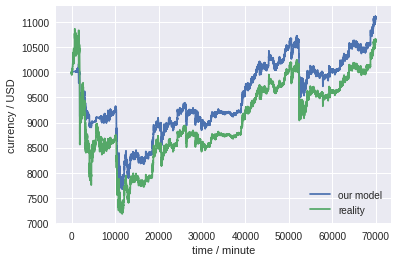

In [0]:
plt.plot(result, label='our model')
plt.plot(bitcoin, label='reality')
plt.legend()
plt.xlabel('time / minute')
plt.ylabel('currency / USD')

In [0]:
def simulate(period, threshold_buy = 0.33, threshold_sell = 0.38, unit = 0.1):
  currency = 10000
  share = 0
  init_share = currency / price[29]
  bitcoin = []
  result = []
  for i in range(period - 1):
    cur_price = price[i+30]
    estimate = eval(price[i:i+30])
    #if (i % 100 == 0):
      #print(estimate)
    if (estimate < threshold_buy):
      buying = unit * (threshold_buy - estimate)
      if (currency > buying * cur_price):
        currency = currency - buying * cur_price
        share = share + buying
      else:
        share = share + currency / cur_price
        currency = 0
    elif (estimate > threshold_sell):
      selling = unit * (estimate - threshold_sell)
      if (share > selling):
        share = share - selling
        currency = currency + selling * cur_price
      else:
        currency = currency + share * cur_price
        share = 0
    elif (i > 5 and currency + share * cur_price < 0.9 * result[i - 5]):
        currency = currency + 0.5 * share * cur_price
        share = share / 2
    result.append(currency + share * cur_price)
    bitcoin.append(init_share * cur_price)
    if (i % 10000 == 0):
      print(currency)
      print(share)
  return result, bitcoin

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 719, 7, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 239, 7, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 239, 4, 32)        3104      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 79, 4, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 2, 64)         51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 2, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 1, 64)          102464    
__________

In [0]:
model.fit()

(101440,)

In [0]:
result, bitcoin = simulate(70000)

10000
0
0
10.157098549815501
2739.9502799999927
6.928200313310433
212.27409000000006
9.781229436564729
241.35821666666436
9.764368106884756
0
9.986641076074891
348.72521333333333
9.598373339169314


In [0]:
price = np.array(bitstamp[120000:201440])[:,1]
def eval(price):
  count = 0;
  for i in range(1439):
    if (price[i + 1] > price[i]):
      count = count + 1;
  return (count - 300) / 1440

NameError: ignored

In [0]:
inputs = tf.reshape(tf.stack(X[0:0+200]), (200,60*24,7,1))

In [0]:
y_hat = model.predict(inputs, steps=1)

In [0]:
y_hat.any()

False

In [0]:
def simulate(period, unit = 0.1):
  currency = 10000
  share = 0
  init_share = currency / price[1439]
  bitcoin = []
  result = []
  for i in range(period - 1):
    cur_price = price[i+1440]
    estimate = eval(price[i:i+1440])
    #if (i % 100 == 0):
      #print(estimate)
    if (estimate > 0):
      buying = unit * (estimate / 100)
      if (currency > buying * cur_price):
        currency = currency - buying * cur_price
        share = share + buying
      else:
        share = share + currency / cur_price
        currency = 0
    elif (estimate < 0):
      selling = -unit * (estimate / 100)
      if (share > selling):
        share = share - selling
        currency = currency + selling * cur_price
      else:
        currency = currency + share * cur_price
        share = 0
    result.append(currency + share * cur_price)
    bitcoin.append(init_share * cur_price)
    if (i % 10000 == 0):
      print(currency)
      print(share)
  plt.plot(result)
  plt.plot(bitcoin)
  return currency + share * price[period - 1]

In [0]:
simulate(70000)

10000
0
0
10.157098549815501
2739.9502799999927
6.928200313310433
212.27409000000006
9.781229436564729
241.35821666666436
9.764368106884756
0
9.986641076074891
348.72521333333333
9.598373339169314


([10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  9999.999999999998,
  9999.999459999997,
  10000.006299999997,
  10000.00553333333,
  10000.00163333333,
  9999.99743333333,
  9999.991783333331,
  9999.984209999999,
  9999.973379999998,
  10000.009379999998,
  10000.009379999998,
  10000.009379999998,
  10000.007599999999,
  9999.935146666665,
  9999.935146666665,
  9999.932786666664,
  9999.932786666663,
  9999.932786666663,
  9999.93619333333,
  9999.93619333333,
  9999.93619333333,
  9999.936193333328,
  10000.000066666662,
  10000.0